# IOT domain analyst Lab Task 
#### Shvetha Nambiar 19BEC0096
### Task 2 Predictive Analytics using Python.   (Linear Regression)

### (a)	Using Linear Regression algorithm on the sample data-set [(1,3) (2,5) (3,7) (4,7) (5,11) (6,13)] predict the values for X=10, 15, 20, 25. Also, evaluate the accuracy of the model (R2). 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# input sample dataset
X= np.array ([1,2,3,4,5,6])
Y= np.array ([3,5,7,7,11,13])

In [3]:
# calculate a, b that gives least error
denominator = X.dot(X)-X.mean() *X.sum()
a= (X.dot(Y)-Y.mean()*X.sum())/denominator
b= (Y.mean() * X.dot(X)- X.mean () * X.dot(Y) )/denominator
Yt=a*X + b
d1= Y - Yt
d2=Y - Y.mean()
rsqr = 1- d1.dot(d1) / d2.dot(d2)
print("a=", a, "b=",b, "rsqr=",rsqr)

a= 1.9428571428571428 b= 0.866666666666671 rsqr= 0.9527472527472527


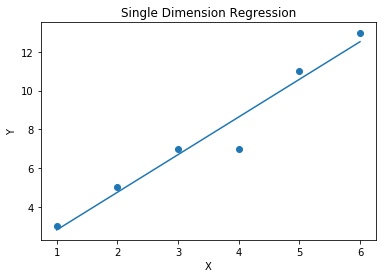

In [4]:
# Ploting the points
plt.scatter (X,Y)
plt.plot (X,Yt)
plt.title ('Single Dimension Regression')
plt.xlabel ('X')
plt.ylabel ('Y')
plt.show()

In [5]:
#predictions
X_pred=[10,15,20,25]
Y_pred=[]
for i in X_pred:
  Y_pred.append(a*i+b)
print(Y_pred)

[20.295238095238098, 30.009523809523813, 39.72380952380953, 49.438095238095244]


### (b)	Find price of home with 3000 sqr ft area, 3 bedrooms, 40-year-old and 4800 sqr ft area, 3 bedrooms, 35-year-old. Also find the accuracy of the model. 

In [6]:
#insert libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score

In [7]:
#importing dataset
data = pd.read_csv("C:/Users/Shvetha M Nambiar/Dropbox/VIT/F-IOT/LAB/Dataset2.csv")
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [8]:
#data preprocessing 
data.bedrooms.median()
data.bedrooms = data.bedrooms.fillna(data.bedrooms.median())
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [9]:
reg = linear_model.LinearRegression()
reg.fit(data.drop('price',axis='columns'),data.price)

LinearRegression()

In [10]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [11]:
reg.intercept_

221323.00186540443

In [12]:
pred = reg.predict(data.drop('price',axis='columns'))

In [13]:
#price of home with 3000 sqr ft area, 3 bedrooms, 40 year old
predicted_val_1=reg.predict([[3000, 3, 40]])
predicted_val_1

array([498408.25158031])

In [14]:
real_val_1= 112.06244194*3000 + 23388.88007794*3 - 3231.71790863*40 +221323.00186540443
real_val_1

498408.25157402444

In [15]:
#price of home with 4800 sqr ft area, 3 bedrooms, 35-year-old
predicted_val_2=reg.predict([[4800, 3, 35]])
predicted_val_2

array([716279.23661931])

In [16]:
real_val_2= 112.06244194*4800 + 23388.88007794*3 - 3231.71790863*35 +221323.00186540443
real_val_2

716279.2366091744

In [17]:
#accuracy 
score=r2_score(data.price,pred)
score

0.9550196399325818

### (c)	Using scikit-learn library build a linear regression model to predict the values of a subset chosen from the Book-1 dataset and also find accuracy of the model. 

In [18]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt

In [19]:
#import dataset
data = pd.read_csv("C:/Users/Shvetha M Nambiar/Dropbox/VIT/F-IOT/LAB/Book1.csv") 
data.head()

,Mileage,Avg_yrs,Sell Price ($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


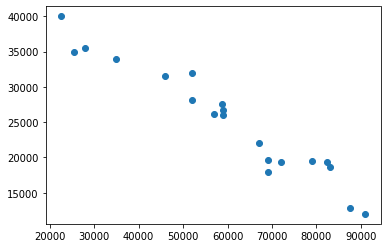

In [20]:
plt.scatter(data['Mileage'],data['Sell Price ($)'])

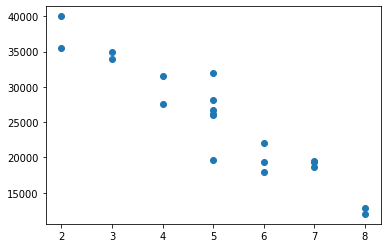

In [21]:
plt.scatter(data['Avg_yrs'],data['Sell Price ($)'])
X=data[['Mileage','Avg_yrs']]
Y=data[['Sell Price ($)']]

In [22]:
#split dataset to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size=0.2)
print(len(X_train))
print(len(X_test))

16
4


In [23]:
#linear regression model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.predict(X_test)
print(reg.predict(X_test))

[[25251.03415575]
 [27623.62432464]
 [38645.83260379]
 [16434.14900795]]


In [24]:
#score /accuracy
reg.score(X_test, y_test)

0.9664528968638085